# Bank Marketing Analysis

Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
   The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
   This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns). 
   Using the rminer package and R tool (http://cran.r-project.org/web/packages/rminer/), we found that the addition of the five new social and economic attributes (made available here) lead to substantial improvement in the prediction of a success, even when the duration of the call is not included. Note: the file can be read in R using: d=read.table("bank-additional-full.csv",header=TRUE,sep=";")
   
   The zip file includes two datasets: 
      1) bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank-additional.csv with 10% of the examples (4119), randomly selected from bank-additional-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).

   The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

5. Number of Instances: 41188 for bank-additional-full.csv

6. Number of Attributes: 20 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2014].

   Input variables:
   # bank client data:
   1 - age (numeric) </br>
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   # related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   # other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, tree, linear_model, ensemble
import graphviz
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# 16 feature data
# Sample
data_bank = pd.read_csv("data/bank.csv", delimiter = ";")
# Full
data_bank_full = pd.read_csv("data/bank-full.csv", delimiter = ";")

In [4]:
# 19 feature data
# Sample
data_bank_add = pd.read_csv("data/bank-additional.csv", delimiter = ";")
# Full
data_bank_add_full = pd.read_csv("data/bank-additional-full.csv", delimiter = ";")

In [5]:
data_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
data_bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
data_bank_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [8]:
data_bank_add_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
# Dimensions of the data
print("The shape of bank w/ 16 features (sample): {} x {}".format(data_bank.shape[0], data_bank.shape[1]))
print("The shape of bank w/ 16 features (full): {} x {}".format(data_bank_full.shape[0], data_bank_full.shape[1]))
print("The shape of bank w/ 20 features (sample): {} x {}".format(data_bank_add.shape[0], data_bank_add.shape[1]))
print("The shape of bank w/ 20 features(full): {} x {}".format(data_bank_add_full.shape[0], data_bank_add_full.shape[1]))

The shape of bank w/ 16 features (sample): 4521 x 17
The shape of bank w/ 16 features (full): 45211 x 17
The shape of bank w/ 20 features (sample): 4119 x 21
The shape of bank w/ 20 features(full): 41188 x 21


In [10]:
print("There are ( {} ) data points in 16 features (sample) data_bank".format(data_bank.shape[0]))
print("There are ( {} ) data points in 16 features (full) data_bank".format(data_bank_full.shape[0]))
print("There are ( {} ) data points in 20 features (sample) data_bank".format(data_bank_add.shape[0]))
print("There are ( {} ) data points in 20 features (full) data_bank".format(data_bank_add_full.shape[0]))

There are ( 4521 ) data points in 16 features (sample) data_bank
There are ( 45211 ) data points in 16 features (full) data_bank
There are ( 4119 ) data points in 20 features (sample) data_bank
There are ( 41188 ) data points in 20 features (full) data_bank


# So now we have the shapes of 4 data sets, we will create some distributions and plots of the sampled dataset (data_bank) to get a sense of what we are working with.

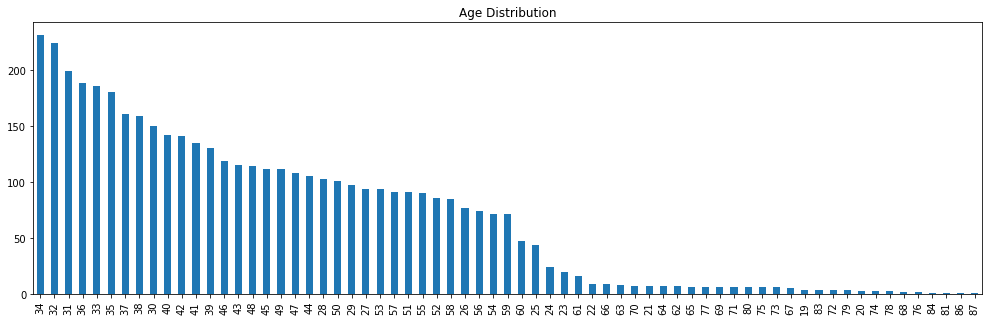

In [11]:
age_dist = pd.Series.value_counts(data_bank.iloc[:,0])
age_dist.plot(kind = 'bar', figsize = (17,5), title = 'Age Distribution')


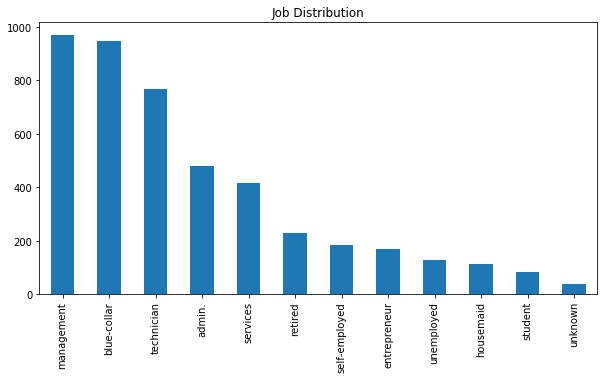

In [12]:
job = pd.Series.value_counts(data_bank.iloc[:,1])
job.plot(kind = 'bar', figsize = (10,5), title = 'Job Distribution')

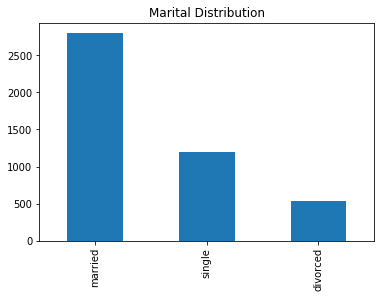

In [13]:
marital = pd.Series.value_counts(data_bank.iloc[:,2])
marital.plot(kind = 'bar', title = 'Marital Distribution')

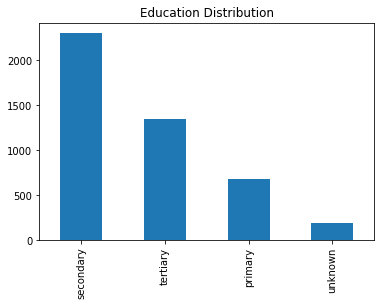

In [14]:
education = pd.Series.value_counts(data_bank.iloc[:,3])
education.plot(kind = 'bar', title = 'Education Distribution')

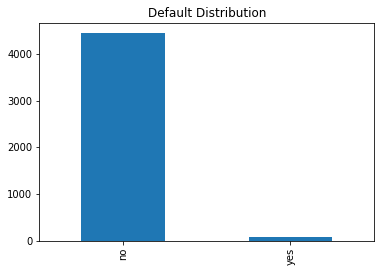

In [15]:
default = pd.Series.value_counts(data_bank.iloc[:,4])
default.plot(kind = 'bar', title = 'Default Distribution')

Average yearly balance is: 1422.6578190665782
Median yearly balance is: 444.0


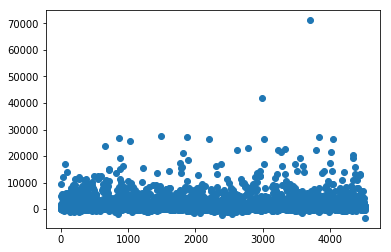

In [16]:
# Distribution of avg yearly balance is continuous so we will use a scatter plot
avg_yb = data_bank.iloc[:, 5].sum() / 4521
med_yb = data_bank.iloc[:, 5].median(axis = 0)
print("Average yearly balance is: {}".format(avg_yb))
print("Median yearly balance is: {}".format(med_yb))
xax = np.linspace(0, 4520, num = 4521)
plt.scatter(xax, data_bank.iloc[:,5])

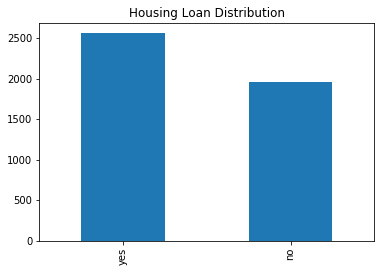

In [17]:
housing_loan = pd.Series.value_counts(data_bank.iloc[:,6])
housing_loan.plot(kind = 'bar', title = 'Housing Loan Distribution')

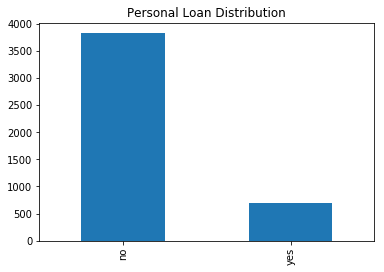

In [18]:
personal_loan = pd.Series.value_counts(data_bank.iloc[:,7])
personal_loan.plot(kind = 'bar', title = 'Personal Loan Distribution')

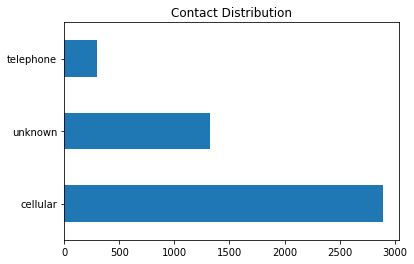

In [19]:
contact_type = pd.Series.value_counts(data_bank.iloc[:,8])
contact_type.plot(kind = 'barh', title = 'Contact Distribution')

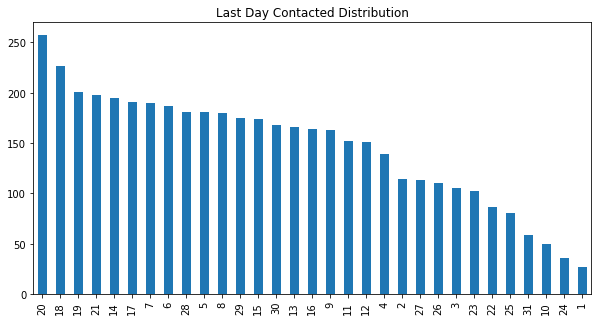

In [20]:
last_day_contact = pd.Series.value_counts(data_bank.iloc[:,9])
last_day_contact.plot(kind = 'bar', title = 'Last Day Contacted Distribution', figsize = (10,5))

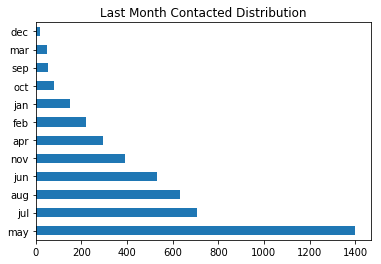

In [21]:
last_month_contact = pd.Series.value_counts(data_bank.iloc[:,10])
last_month_contact.plot(kind = 'barh', title = 'Last Month Contacted Distribution')

Average duration of last contact is: 263.96129174961294 sec
Median duration of last contact balance is: 185.0 sec


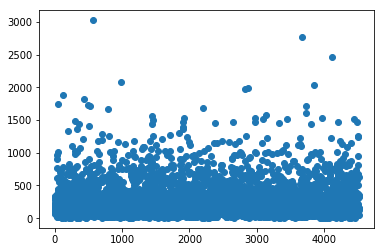

In [22]:
# Distribution of Duration of Last Contact in seconds
avg_dur = data_bank.iloc[:, 11].sum() / 4521
med_dur = data_bank.iloc[:, 11].median(axis = 0)
print("Average duration of last contact is: {} sec".format(avg_dur))
print("Median duration of last contact balance is: {} sec".format(med_dur))
xax = np.linspace(0, 4520, num = 4521)
plt.scatter(xax, data_bank.iloc[:,11])

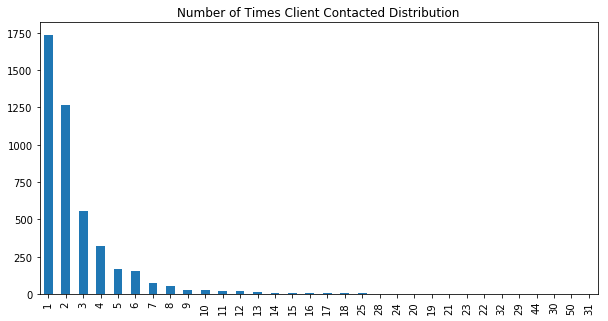

In [23]:
number_of_contacts = pd.Series.value_counts(data_bank.iloc[:,12])
number_of_contacts.plot(kind = 'bar', title = 'Number of Times Client Contacted Distribution', figsize = (10, 5))

Average duration of last contact is: 39.766644547666445 sec
Median duration of last contact balance is: -1.0 sec


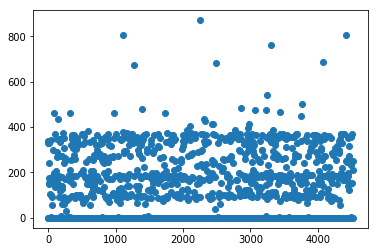

In [24]:
days_passed = pd.Series.value_counts(data_bank.iloc[:,13])
# Distribution of datys passed since last contacted from previous campaign
# -1 value indicates client was not contacted
avg_dpassed = data_bank.iloc[:, 13].sum() / 4521
med_dpassed = data_bank.iloc[:, 13].median(axis = 0)
print("Average duration of last contact is: {} sec".format(avg_dpassed))
print("Median duration of last contact balance is: {} sec".format(med_dpassed))
xax = np.linspace(0, 4520, num = 4521)
plt.scatter(xax, data_bank.iloc[:,13])

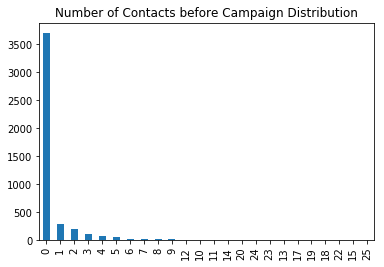

In [25]:
previous_contact = pd.Series.value_counts(data_bank.iloc[:,14])
previous_contact.plot(kind = 'bar', title = 'Number of Contacts before Campaign Distribution')

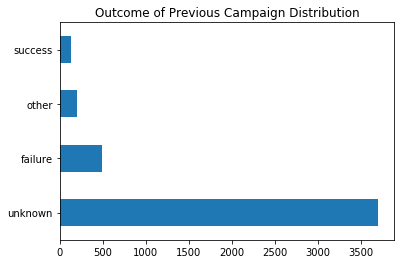

In [26]:
outcome_previous = pd.Series.value_counts(data_bank.iloc[:,15])
outcome_previous.plot(kind = 'barh', title = 'Outcome of Previous Campaign Distribution')

In [27]:
# Calculate percentage of success from previous campaign
total = pd.Series.value_counts(data_bank.iloc[:,14]).sum()
print("Level of Success from previous campaign: {}".format(129/total))

Level of Success from previous campaign: 0.028533510285335104


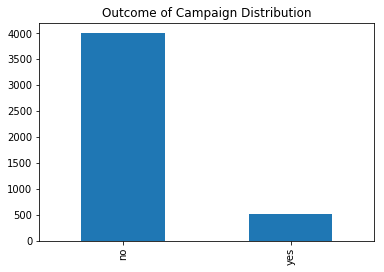

In [28]:
outcome = pd.Series.value_counts(data_bank.iloc[:,16])
outcome.plot(kind = 'bar', title = 'Outcome of Campaign Distribution')

In [29]:
# Calculate percentage of success from current campaign
total = pd.Series.value_counts(data_bank.iloc[:,16]).sum()
print("Level of Success from current campaign: {}".format(521/total))

Level of Success from current campaign: 0.11523999115239991


# Now that we have an idea of how the data is distributed, we will first use decision trees to classify the data and to predict. We will classify and predict using logistic regression as well.

In [30]:
# Converting all categorical data to numeric
le = preprocessing.LabelEncoder()
non_numeric = ['default', 'housing', 'loan', 'poutcome', 'job', 'marital', 'education', 'contact', 'month', 'y']
for i in non_numeric:
    le.fit(data_bank[i])
    data_bank[i] = le.transform(data_bank[i])
data_bank
# data_bank['poutcome']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
5,35,4,2,2,0,747,0,0,0,23,3,141,2,176,3,0,0
6,36,6,1,2,0,307,1,0,0,14,8,341,1,330,2,1,0
7,39,9,1,1,0,147,1,0,0,6,8,151,2,-1,0,3,0
8,41,2,1,2,0,221,1,0,2,14,8,57,2,-1,0,3,0
9,43,7,1,0,0,-88,1,1,0,17,0,313,1,147,2,0,0


In [31]:
# OneHotEncoder to create binary vectors for each integer label
# enc = preprocessing.OneHotEncoder()
# enc.fit(data_bank.iloc[:, 1:3].values.reshape(-1,1))  
# enc.n_values_

# enc.feature_indices_

# # enc.transform(2).toarray()

In [32]:
# Fitting the model with Education entries and Target (y) labels
X_edu = data_bank.iloc[:,3:4]
Y = data_bank["y"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_edu, Y)

In [33]:
# Visualize
dot_data = tree.export_graphviz(clf, out_file = None, 
                                feature_names = ['education'], class_names = ['Term Deposit (y)'], 
                                filled = True)
graph = graphviz.Source(dot_data)
graph 

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

# Education Probabilities

In [34]:
# Calculate probabilities
prob_min_edu = clf.predict_proba(0)
prob_mid_edu = clf.predict_proba(1)
prob_high_edu = clf.predict_proba(2)
print("Min education, won't subscribe to a term deposit: {}".format(prob_min_edu[0][0]))
print("Min education, will subscribe to a term deposit: {}".format(prob_min_edu[0][1]))
print("Mid education, won't subscribe to a term deposit: {}".format(prob_mid_edu[0][0]))
print("Mid education, will subscribe to a term deposit: {}".format(prob_mid_edu[0][1]))
print("High education, won't subscribe to a term deposit: {}".format(prob_high_edu[0][0]))
print("High education, will subscribe to a term deposit: {}".format(prob_high_edu[0][1]))

ValueError: Expected 2D array, got scalar array instead:
array=0.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Fitting the model with Housing Loan entries and Target (y) labels
X_house = data_bank.iloc[:, 6:7]
Y = data_bank["y"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_house, Y)

In [ ]:
# Visualize
dot_data = tree.export_graphviz(clf, out_file = None, 
                                feature_names = ['housing'], class_names = ['Term Deposit (y)'], 
                                filled = True)
graph = graphviz.Source(dot_data)
graph 

# Housing Loan Probabilities

In [ ]:
# Calculate probabilities
prob_no_hloan = clf.predict_proba(0)
prob_yes_hloan = clf.predict_proba(1)
print("No housing loan, won't subscribe to a term deposit: {}".format(prob_no_hloan[0][0]))
print("No housing loan, will subscribe to a term deposit: {}".format(prob_no_hloan[0][1]))
print("Yes housing loan, won't subscribe to a term deposit: {}".format(prob_yes_hloan[0][0]))
print("Yes housing loan, will subscribe to a term deposit: {}".format(prob_yes_hloan[0][1]))

In [ ]:
# Fitting the model with Personal Loan entries and Target (y) labels
X_loan = data_bank.iloc[:, 7:8]
Y = data_bank["y"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_loan, Y)

In [ ]:
dot_data = tree.export_graphviz(clf, out_file = None, 
                                feature_names = ['loan'], class_names = ['Term Deposit (y)'], 
                                filled = True)
graph = graphviz.Source(dot_data)
graph 

# Personal Loan Probabilities

In [ ]:
# Calculate probabilities
prob_no_ploan = clf.predict_proba(0)
prob_yes_ploan = clf.predict_proba(1)
print("No personal loan, won't subscribe to a term deposit: {}".format(prob_no_ploan[0][0]))
print("No personal loan, will subscribe to a term deposit: {}".format(prob_no_ploan[0][1]))
print("Yes personal loan, won't subscribe to a term deposit: {}".format(prob_yes_ploan[0][0]))
print("Yes personal loan, will subscribe to a term deposit: {}".format(prob_yes_ploan[0][1]))

### We have just calculated the probablities and vizualizations of three different categories. Those categories being the level of education a client had, whether or not they have a housing loan and whether or not they have take out a personal loan. We will now use Logistic Regression to fit a model and make predictions.

In [ ]:
X = data_bank.iloc[:, 3:4]
Y = data_bank['y']
log_model = linear_model.LogisticRegression()
log_model.fit(X, Y)

# Education Probabilities

In [ ]:
# Calculate probabilities
prob_min_edu = log_model.predict_proba(0)
prob_mid_edu = log_model.predict_proba(1)
prob_high_edu = log_model.predict_proba(2)
print("Min education, won't subscribe to a term deposit: {}".format(prob_min_edu[0][0]))
print("Min education, will subscribe to a term deposit: {}".format(prob_min_edu[0][1]))
print("Mid education, won't subscribe to a term deposit: {}".format(prob_mid_edu[0][0]))
print("Mid education, will subscribe to a term deposit: {}".format(prob_mid_edu[0][1]))
print("High education, won't subscribe to a term deposit: {}".format(prob_high_edu[0][0]))
print("High education, will subscribe to a term deposit: {}".format(prob_high_edu[0][1]))

In [ ]:
X = data_bank.iloc[:, 6:7]
Y = data_bank['y']
log_model = linear_model.LogisticRegression()
log_model.fit(X, Y)

# Housing Loan Probabilities

In [ ]:
# Calculate probabilities
prob_no_hloan = log_model.predict_proba(0)
prob_yes_hloan = log_model.predict_proba(1)
print("No housing loan, won't subscribe to a term deposit: {}".format(prob_no_hloan[0][0]))
print("No housing loan, will subscribe to a term deposit: {}".format(prob_no_hloan[0][1]))
print("Yes housing loan, won't subscribe to a term deposit: {}".format(prob_yes_hloan[0][0]))
print("Yes housing loan, will subscribe to a term deposit: {}".format(prob_yes_hloan[0][1]))

In [ ]:
X = data_bank.iloc[:, 7:8]
Y = data_bank['y']
log_model = linear_model.LogisticRegression()
log_model.fit(X, Y)

# Personal Loan Probabilities

In [ ]:
# Calculate probabilities
prob_no_ploan = log_model.predict_proba(0)
prob_yes_ploan = log_model.predict_proba(1)
print("No personal loan, won't subscribe to a term deposit: {}".format(prob_no_ploan[0][0]))
print("No personal loan, will subscribe to a term deposit: {}".format(prob_no_ploan[0][1]))
print("Yes personal loan, won't subscribe to a term deposit: {}".format(prob_yes_ploan[0][0]))
print("Yes personal loan, will subscribe to a term deposit: {}".format(prob_yes_ploan[0][1]))

# Random Forest

In [ ]:
X = data_bank.iloc[:, 3:4]
Y = data_bank.iloc[:, 16]
rclf = ensemble.RandomForestClassifier
rclf.fit(X, Y)